In [2]:
# mengimport libary
from skimage.feature import greycomatrix
import math #mengimport libary math
import os #mengimport libary os untuk membaca dataset
import pandas as pd #nengimport libary pandas untuk membuat dataframe dari hasil pengolahan citra
import matplotlib.pyplot as plt #mengimport libary pyplot dari matplotlib sebagai plt
import numpy as np #mengimport libary numpy sebagai np
import cv2 as cv #mengimport libary cv2 sebagai cv
#semua libary ini menyimpan fungsi-fungsi yang diperlukan dalam pengolahan citra 

In [3]:
# fungsi InsertGambar
#fungsi ini digunakan untuk membaca semua citra dalam suatu folder dan memasukannya ke program
def insertGambar(folder):
    images = [] #variabel images untuk menyimpan data matriks dari citra-citra
    filenames = [] #variabel filenames untuk menyimpan nama-nama file dari setiap citra
    labels = [] #variabel labels untuk menyimpan nama folder dari tiap citra

    for label in os.listdir(folder): #melakukan perulangan untuk mengakses tiap subfolder dalam folder "folder"
        for filename in os.listdir("Batik/"+label): #melakukan perulangan untuk mengakses tiap file dalam subfolder
            img = cv.imread(os.path.join("Batik/"+label,filename), 0) #mengimport citra dengan fungsi imread
            filenames.append(filename) #menyimpan nama file dalam variabel filenames
            labels.append(label) #menyimpan nama sub folder (label) dalam variabel labels
            if img is not None: #mengecek apakah terdapat data dalam variabel img
                images.append(img) #menyimpan img dalam variabel images
    return images, filenames, labels #mengembalikan variabel images, filenames, dan labels sebagai output fungsi

images, filenames, labels = insertGambar("Batik") #memanggil fungsi insertGambar pada folder "Batik"

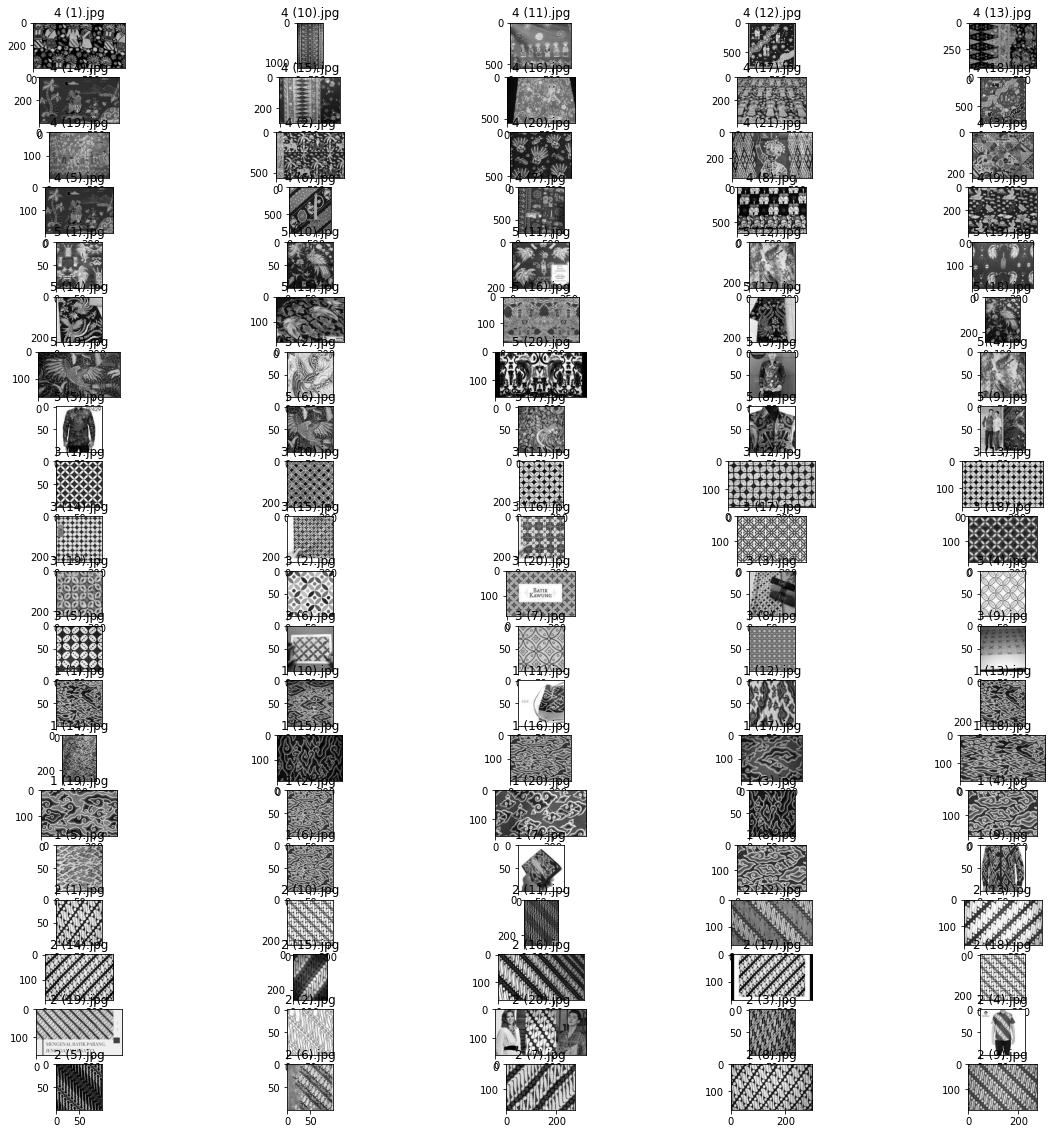

In [4]:
# menampilkan gambar yang berhasil di import
fig = plt.figure(figsize=(20,20)) #membuat sebuah figure dengan ukuran (figsize) 20 x 20
columns = 5 #menentukan banyak kolom dalam plot
rows = 20 #menentukan banyak baris dalam plot
x = 0 #mendeklarasikan variabel x untuk indexing
for i in range(1,len(images)+1): #melakukan perulangan untuk mengakses semua dataset
    fig.add_subplot(rows, columns, i) #membuat subplot dengan dimensi (baris, kolom), i merupakan nomor dari plot
    plt.title(filenames[x]) #memberikan nama/judul dari filename x pada plot 
    plt.imshow(images[x], "gray") #menampilkan gambar/images x dalam plot 
    x+=1 #

# FUNGSI-FUNGSI

In [5]:
# Mendeklarasikan fungsi untuk membuat Matriks Kookurensi 
def kookurensi(img, sudut):
    matriks = np.zeros([256,256]) #membuat matriks untuk menyimpan matriks kookurensi
    p,l = img.shape #menentukan dimensi (Panjang x Lebar) dari citra
    
    #membuat matriks kookurensi dengan sudut 0 derajat
    if(sudut == 0):
        #melakukan perulangan untuk menelusuri tiap pixel dari citra
        for i in range(p): 
            for j in range(l): 
                if(j+1 < l):
                    #menghitung kookurensi antar pixel
                    matriks[img[i,j], img[i,j+1]] += 1
    
    #membuat matriks kookurensi dengan sudut 45 derajat
    elif (sudut == 45):
        #melakukan perulangan untuk menelusuri tiap pixel dari citra
        for i in range(p):
            for j in range(l):
                if(i-1 >= 0 and j+1 < l):
                    #menghitung kookurensi antar pixel
                    matriks[img[i,j], img[i-1,j+1]] += 1
    
    #membuat matriks kookurensi dengan sudut 90 derajat            
    elif (sudut == 90):
        #melakukan perulangan untuk menelusuri tiap pixel dari citra
        for i in range(p):
            for j in range(l):
                if(i-1 >= 0):
                    #menghitung kookurensi antar pixel
                    matriks[img[i,j], img[i-1,j]] += 1
    
    #membuat matriks kookurensi dengan sudut 135 derajat
    elif (sudut == 135):
        #melakukan perulangan untuk menelusuri tiap pixel dari citra
        for i in range(p):
            for j in range(l):
                if(i-1 >=0 and j-1 >=0 ):
                    #menghitung kookurensi antar pixel
                    matriks[img[i,j], img[i-1,j-1]] += 1
    
    #melakukan transpose terhadap matriks kookurensi
    awal = matriks.transpose()+matriks
    total = sum(sum(awal)) #menjumlahkan total dari matriks awal
    hasil = awal/total #membagi matriks awal dengan total dari matriks awal
    return hasil #mengembalikan variabel hasil sebagai hasil dari matriks kookurensi

In [6]:
# Mendeklarasikan fungsi untuk menentukan Fitur Entropy
def entropy(citra):
    x,y = citra.shape #menentukan dimensi (x .  y) dari citra 
    hasil = 0 #mendeklarasikan variabel hasil untuk menyimpan hasil perhitungan entropy
    #melakukan perulangan untuk menelusuri tiap pixel dalam citra
    for i in range(x):
        for j in range(y):
            #mengecek apakah pixel tidak bernilai 0
            if (citra[i,j]!=0):
                hasil += math.log(citra[i,j])*citra[i,j] #menerapkan rumus perhitungan entropy pada pixel ke-[i,j]
    return hasil*-1 #mengembalikan hasil sebagai hasil perhitungan entropy

In [7]:
# Mendeklarasikan fungsi untuk menentukan Fitur Contrast
def contrast(citra):
    x,y = citra.shape #menentukan dimensi (x .  y) dari citra 
    hasil = 0 #mendeklarasikan variabel hasil untuk menyimpan hasil perhitungan contrast
    #melakukan perulangan untuk menelusuri tiap pixel dalam citra
    for i in range(x):
        for j in range(y):
            hasil += ((i-j)**2)*citra[i,j] #menerapkan rumus perhitungan contrast pada pixel ke-[i,j]
    return hasil #mengembalikan hasil sebagai hasil perhitungan contrast

In [8]:
# Mendeklarasikan fungsi untuk menentukan Fitur Dissimilarity
def dissimilarity(citra):
    x,y = citra.shape #menentukan dimensi (x .  y) dari citra 
    hasil = 0 #mendeklarasikan variabel hasil untuk menyimpan hasil perhitungan dissimilarity
    #melakukan perulangan untuk menelusuri tiap pixel dalam citra
    for i in range(x):
        for j in range(y):
            hasil += (abs(i-j))*citra[i,j] #menerapkan rumus perhitungan dissimilarity pada pixel ke-[i,j]
    return hasil #mengembalikan hasil sebagai hasil perhitungan dissimilarity

In [9]:
# Mendeklarasikan fungsi untuk menentukan Fitur Homogeneity
def homogeneity(citra):
    x,y = citra.shape #menentukan dimensi (x .  y) dari citra 
    hasil = 0 #mendeklarasikan variabel hasil untuk menyimpan hasil perhitungan homogeneity
    #melakukan perulangan untuk menelusuri tiap pixel dalam citra
    for i in range(x):
        for j in range(y):
            hasil += citra[i,j]/(1+(i-j)**2) #menerapkan rumus perhitungan homogenity pada pixel ke-[i,j]
    return hasil #mengembalikan hasil sebagai hasil perhitungan homogeneity

In [10]:
# Mendeklarasikan fungsi untuk menentukan Fitur ASM
def ASM(citra):
    x,y = citra.shape #menentukan dimensi (x .  y) dari citra 
    hasil = 0 #mendeklarasikan variabel hasil untuk menyimpan hasil perhitungan ASM
    #melakukan perulangan untuk menelusuri tiap pixel dalam citra
    for i in range(x):
        for j in range(y):
            hasil += citra[i,j]**2 #menerapkan rumus perhitungan ASM pada pixel ke-[i,j]
    return hasil #mengembalikan hasil sebagai hasil perhitungan ASM

In [11]:
# Mendeklarasikan fungsi untuk menentukan Fitur Energy
def energy(citra):
    hasil = math.sqrt(ASM(citra)) #menentukan fitur energy dengan mencari akar (sqrt) dari hasil perhitungan ASM pada citra
    return hasil #mengembalikan hasil sebagai hasil perhitungan energy

In [12]:
# Mendeklarasikan fungsi-fungsi untuk menentukan Fitur Correlation

#mendeklarasikan fungsi m untuk mencari nilai miu dari citra
def m(citra, pil):
    x,y = citra.shape #menentukan dimensi (x .  y) dari citra 
    miu = 0 #mendeklarasikan variabel miu untuk menyimpan hasil perhitungan miu
    for i in range(x):
        for j in range(y):
            #mengecek nilai varibel pil
            if (pil==0):
                miu += i*citra[i,j] #menerapkan rumus miu pada pixel ke[i,j]
            else:
                miu += j*citra[i,j] #menerapkan rumus miu pada pixel ke[i,j]
    return miu #mengembalikan variabel miu sebagai hasil dari penentuan miu

#mendeklarasikan fungsi s untuk mencari nilai sigma dari citra
def s(citra, pil):
    x,y = citra.shape #menentukan dimensi (x .  y) dari citra
    sigma = 0 #mendeklarasikan variabel sigma untuk menyimpan hasil perhitungan sigma
    mi = m(citra,0)
    mj = m(citra,1)
    for i in range(x):
        for j in range(y):
            #mengecek nilai varibel pil
            if (pil==0):
                sigma += citra[i,j]*((i-mi)**2) #menerapkan rumus sigma pada pixel ke[i,j]
            else:
                sigma += citra[i,j]*((j-mj)**2) #menerapkan rumus sigma pada pixel ke[i,j]
    return sigma #mengembalikan variabel sigma sebagai hasil dari penentuan miu

def correlation(citra):
    x,y = citra.shape #menentukan dimensi (x . y) dari citra
    mi = m(citra,0) #menentukan miu dari baris citra
    mj = m(citra,1) #menentukan miu dari kolom citra
    si = s(citra,0) #menentukan sigma dari baris citra
    sj = s(citra,1) #menentukan sigma dari kolom citra
    hasil = 0 #mendeklarasikan variabel hasil untuk menyimpan hasil perhitungan correlation
    #melakukan perulangan untuk menelusuri tiap pixel dalam citra
    for i in range(x):
        for j in range(y):
            hasil += citra[i][j]*(((i-mi)*(j-mj))/math.sqrt((si)*(sj))) #menerapkan rumus correlation pada citra pixel ke[i,j]
    return hasil #mengembalikan hasil sebagai hasil perhitungan correlation

# FUNGSI EKSTRAKSI FITUR

In [13]:
# fungsi untuk mengeksekusi seluruh fungsi guna mengekstraksi fitur dari citra
def execute(images, filenames, labels, sudut):
    result = [] #mendefinisikan variabel result untuk menyimpan hasil dari ekstraksi fitur
    for i in range(len(images)): #melakukan perulangan untuk menelusuri seluruh img dalam dataset images
        matriks = kookurensi(images[i], sudut) #menentukan matriks kookurensi dari images ke i dengan sudut tertentu
        #memanggil tiap fungsi untuk menentukan fitur dari matriks
        res_img = [ contrast(matriks), 
                    dissimilarity(matriks), 
                    homogeneity(matriks), 
                    entropy(matriks), 
                    ASM(matriks), 
                    energy(matriks),
                    correlation(matriks),
                    filenames[i],
                    labels[i]] 
        result.append(res_img) #menyimpan data fitur yang telah didapatkan dalam variabel result
    return result #mengembalikan variabel result sebagai hasil dari ekstraksi

In [14]:
#mendefinisikan variabel columns untuk menyimpan label untuk kolom data
columns = [
    "contrast", "dissimilarity", "homogeneity", "entropy", "ASM", "energy", "correlation", "filename", "labels"
]

In [15]:
#mendeklarasikan fungsi untuk mengexport dataframe kedalam file csv
def export(data, namafile):
    glcm_df = pd.DataFrame(data, columns = columns) #membuat data menjadi dataframe
    glcm_df.to_csv(namafile) #mengexport ke csv

In [16]:
#ekstraksi menggunakan sudut 45
dataresult = execute(images, filenames, labels, 0)
export(dataresult, "0derajat.csv") #mengexport data dengan fungsi export()
data = pd.read_csv("0derajat.csv") #mengambil data dari file csv
data #menampilkan data

,Unnamed: 0,contrast,dissimilarity,homogeneity,entropy,ASM,energy,correlation,filename,labels
0,0,1237.432575,20.905798,0.205116,8.516266,0.005582,0.074716,0.886492,4 (1).jpg,Betawi
1,1,923.683009,17.983322,0.167327,9.123769,0.000360,0.018970,0.802586,4 (10).jpg,Betawi
2,2,527.296921,10.085419,0.357640,8.125346,0.001118,0.033441,0.848571,4 (11).jpg,Betawi
3,3,672.794603,13.150624,0.319273,7.912830,0.003898,0.062437,0.921123,4 (12).jpg,Betawi
4,4,1345.295840,23.320024,0.198334,8.810725,0.007115,0.084351,0.847456,4 (13).jpg,Betawi
...,...,...,...,...,...,...,...,...,...,...
95,95,6258.577172,51.863434,0.049246,8.566227,0.000495,0.022241,0.346771,2 (5).jpg,Parang
96,96,2404.901313,34.915051,0.052021,9.307672,0.000119,0.010913,0.548511,2 (6).jpg,Parang
97,97,1808.692101,27.832409,0.098876,9.366822,0.000267,0.016332,0.859614,2 (7).jpg,Parang
98,98,3634.039915,36.614489,0.071101,9.657308,0.000118,0.010862,0.757408,2 (8).jpg,Parang


In [17]:
#ekstraksi menggunakan sudut 45
dataresult = execute(images, filenames, labels, 45)
export(dataresult, "45derajat.csv") #mengexport data dengan fungsi export()
data = pd.read_csv("45derajat.csv") #mengambil data dari file csv
data #menampilkan data

,Unnamed: 0,contrast,dissimilarity,homogeneity,entropy,ASM,energy,correlation,filename,labels
0,0,2213.334717,28.130097,0.177407,8.710203,0.004519,0.067225,0.797014,4 (1).jpg,Betawi
1,1,1610.352888,23.791280,0.140286,9.317151,0.000294,0.017142,0.655854,4 (10).jpg,Betawi
2,2,822.470231,13.543376,0.243839,8.536314,0.000644,0.025372,0.763901,4 (11).jpg,Betawi
3,3,1073.831039,16.865566,0.271189,8.102970,0.003026,0.055006,0.874123,4 (12).jpg,Betawi
4,4,2284.880251,31.122298,0.168639,9.011236,0.005399,0.073481,0.740820,4 (13).jpg,Betawi
...,...,...,...,...,...,...,...,...,...,...
95,95,6797.005102,54.863279,0.051884,8.611672,0.000488,0.022089,0.289466,2 (5).jpg,Parang
96,96,3104.923783,41.217427,0.037727,9.361336,0.000109,0.010435,0.417670,2 (6).jpg,Parang
97,97,2047.899281,29.911588,0.076454,9.435862,0.000224,0.014963,0.841048,2 (7).jpg,Parang
98,98,4732.687722,42.080388,0.064539,9.729303,0.000108,0.010413,0.684026,2 (8).jpg,Parang


In [18]:
#ekstraksi menggunakan sudut 90
dataresult = execute(images, filenames, labels, 90)
export(dataresult, "90derajat.csv") #mengexport data dengan fungsi export()
data = pd.read_csv("90derajat.csv") #mengambil data dari file csv
data #menampilkan data

,Unnamed: 0,contrast,dissimilarity,homogeneity,entropy,ASM,energy,correlation,filename,labels
0,0,1156.409063,19.961519,0.210827,8.487685,0.005664,0.075258,0.893938,4 (1).jpg,Betawi
1,1,982.971031,18.010073,0.179959,9.100112,0.000383,0.019574,0.789946,4 (10).jpg,Betawi
2,2,506.711423,10.442935,0.285382,8.331205,0.000790,0.028113,0.854570,4 (11).jpg,Betawi
3,3,688.093524,13.238401,0.315917,7.923818,0.003761,0.061328,0.919327,4 (12).jpg,Betawi
4,4,1434.527907,23.943083,0.196902,8.832061,0.006837,0.082688,0.837254,4 (13).jpg,Betawi
...,...,...,...,...,...,...,...,...,...,...
95,95,1699.805657,24.320000,0.115472,8.269307,0.000936,0.030591,0.821359,2 (5).jpg,Parang
96,96,1292.348687,25.150707,0.063097,9.219152,0.000131,0.011459,0.761922,2 (6).jpg,Parang
97,97,664.577301,15.783943,0.133056,9.068497,0.000354,0.018822,0.948395,2 (7).jpg,Parang
98,98,1385.112495,20.144391,0.115702,9.283397,0.000182,0.013501,0.907441,2 (8).jpg,Parang


In [19]:
#ekstraksi menggunakan sudut 135
dataresult = execute(images, filenames, labels, 135)
export(dataresult, "135derajat.csv") #mengexport data dengan fungsi export()
data = pd.read_csv("135derajat.csv") #mengambil data dari file csv
data #menampilkan data

,Unnamed: 0,contrast,dissimilarity,homogeneity,entropy,ASM,energy,correlation,filename,labels
0,0,1947.339993,26.195912,0.179435,8.674875,0.004609,0.067890,0.821408,4 (1).jpg,Betawi
1,1,1537.421657,23.353400,0.139924,9.307833,0.000294,0.017133,0.671440,4 (10).jpg,Betawi
2,2,829.616219,13.057864,0.273882,8.426201,0.000751,0.027398,0.761848,4 (11).jpg,Betawi
3,3,1171.308096,17.573349,0.268729,8.125729,0.003007,0.054838,0.862696,4 (12).jpg,Betawi
4,4,2343.755898,31.485463,0.168309,9.017963,0.005351,0.073151,0.734142,4 (13).jpg,Betawi
...,...,...,...,...,...,...,...,...,...,...
95,95,6218.976839,52.115702,0.055746,8.591946,0.000515,0.022700,0.349903,2 (5).jpg,Parang
96,96,2806.665952,38.275788,0.043315,9.349083,0.000111,0.010528,0.473513,2 (6).jpg,Parang
97,97,2358.288192,32.694585,0.075484,9.470689,0.000222,0.014907,0.816954,2 (7).jpg,Parang
98,98,4199.805760,39.672501,0.065468,9.702924,0.000113,0.010614,0.719598,2 (8).jpg,Parang
